In [ ]:
# plot 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코드 실행후 런타임 다시 시작 해야함

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# 필요한 패키지 다운로드
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 드라이브에서 데이터 가져오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/휴페업데이터/최종 결합 데이터(C,G,F,J) - 최종 결합 데이터(C,G,F,J).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24020 entries, 0 to 24019
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24020 non-null  int64  
 1   사업자번호            24020 non-null  int64  
 2   유동자산             24020 non-null  float64
 3   매출채권             24020 non-null  float64
 4   비유동자산            24020 non-null  float64
 5   유형자산             24020 non-null  float64
 6   자산총계             24020 non-null  float64
 7   유동부채             24020 non-null  float64
 8   비유동부채            24020 non-null  float64
 9   부채총계             24020 non-null  float64
 10  자본금              24020 non-null  float64
 11  이익잉여금(결손금)       24020 non-null  float64
 12  자본총계             24020 non-null  float64
 13  매출액              24020 non-null  float64
 14  판매비와관리비          24020 non-null  float64
 15  영업이익(손실)         24020 non-null  float64
 16  법인세비용차감전순손익      24020 non-null  float64
 17  법인세비용       

In [ ]:
data = data.drop(['Unnamed: 0','사업자번호'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24020 entries, 0 to 24019
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             24020 non-null  float64
 1   매출채권             24020 non-null  float64
 2   비유동자산            24020 non-null  float64
 3   유형자산             24020 non-null  float64
 4   자산총계             24020 non-null  float64
 5   유동부채             24020 non-null  float64
 6   비유동부채            24020 non-null  float64
 7   부채총계             24020 non-null  float64
 8   자본금              24020 non-null  float64
 9   이익잉여금(결손금)       24020 non-null  float64
 10  자본총계             24020 non-null  float64
 11  매출액              24020 non-null  float64
 12  판매비와관리비          24020 non-null  float64
 13  영업이익(손실)         24020 non-null  float64
 14  법인세비용차감전순손익      24020 non-null  float64
 15  법인세비용            24020 non-null  float64
 16  당기순이익(손실)        24020 non-null  float64
 17  기업순이익률      

In [ ]:
x = pd.concat([data.iloc[:,:44],data.iloc[:,47:]], axis=1)
X = x.to_numpy()
Y = data['폐업여부'].to_numpy()
x.info()
Y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24020 entries, 0 to 24019
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             24020 non-null  float64
 1   매출채권             24020 non-null  float64
 2   비유동자산            24020 non-null  float64
 3   유형자산             24020 non-null  float64
 4   자산총계             24020 non-null  float64
 5   유동부채             24020 non-null  float64
 6   비유동부채            24020 non-null  float64
 7   부채총계             24020 non-null  float64
 8   자본금              24020 non-null  float64
 9   이익잉여금(결손금)       24020 non-null  float64
 10  자본총계             24020 non-null  float64
 11  매출액              24020 non-null  float64
 12  판매비와관리비          24020 non-null  float64
 13  영업이익(손실)         24020 non-null  float64
 14  법인세비용차감전순손익      24020 non-null  float64
 15  법인세비용            24020 non-null  float64
 16  당기순이익(손실)        24020 non-null  float64
 17  기업순이익률      

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# MinMaxScaler() 함수로 정규화
scaler = MinMaxScaler()
scaler_fit = scaler.fit(X)
X_scaled = scaler_fit.transform(X)

In [ ]:
# 학습
train_input, test_input, train_target, test_target = train_test_split(X,Y, test_size = 0.3, random_state= 42)

lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(test_input, test_target)]
lgbm_wrapper.fit(train_input, train_target, early_stopping_rounds = 10, eval_metric='logloss',
                 eval_set = evals, verbose = True)

[1]	valid_0's binary_logloss: 0.443832	valid_0's binary_logloss: 0.443832
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.39487	valid_0's binary_logloss: 0.39487
[3]	valid_0's binary_logloss: 0.357199	valid_0's binary_logloss: 0.357199
[4]	valid_0's binary_logloss: 0.326667	valid_0's binary_logloss: 0.326667
[5]	valid_0's binary_logloss: 0.3011	valid_0's binary_logloss: 0.3011
[6]	valid_0's binary_logloss: 0.280062	valid_0's binary_logloss: 0.280062
[7]	valid_0's binary_logloss: 0.261568	valid_0's binary_logloss: 0.261568
[8]	valid_0's binary_logloss: 0.246094	valid_0's binary_logloss: 0.246094
[9]	valid_0's binary_logloss: 0.232427	valid_0's binary_logloss: 0.232427
[10]	valid_0's binary_logloss: 0.220251	valid_0's binary_logloss: 0.220251
[11]	valid_0's binary_logloss: 0.209023	valid_0's binary_logloss: 0.209023
[12]	valid_0's binary_logloss: 0.199019	valid_0's binary_logloss: 0.199019
[13]	valid_0's binary_logloss: 0.189864	valid_0's bin

LGBMClassifier(n_estimators=400)

In [ ]:
# 예측
preds = lgbm_wrapper.predict(test_input)

pred_proba = lgbm_wrapper.predict_proba(test_input)[:, 1]


In [ ]:
# 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(test_target, pred=None, pred_proba = None):
  confusion = confusion_matrix(test_target, pred)
  accuracy = accuracy_score(test_target, pred)
  precision = precision_score(test_target, pred)
  recall = recall_score(test_target, pred)
  f1 = f1_score(test_target, pred)
  roc_auc = roc_auc_score(test_target, pred_proba)
  print('오차 행렬')
  print(confusion)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
  F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc), '\n')

get_clf_eval(test_target, preds, pred_proba)

오차 행렬
[[5594   89]
 [ 217 1306]]
정확도: 0.9575, 정밀도: 0.9362, 재현율: 0.8575,   F1: 0.8951, AUC: 0.9864 



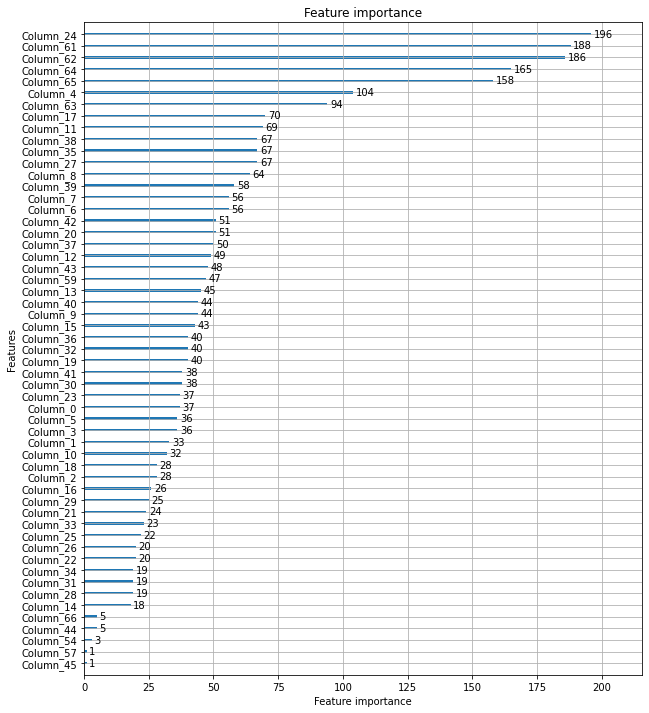

In [ ]:
# Feature importance
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax = ax)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


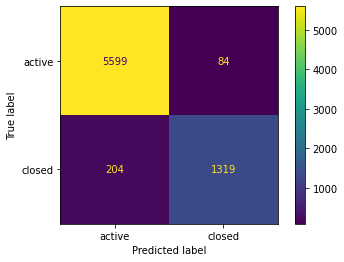

In [ ]:
# 혼동행렬
plot_confusion_matrix(lgbm_wrapper,
                      test_input,
                      test_target,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs = lgbm_wrapper.predict(test_input)

In [ ]:
y_preds = [1 if x>0.5 else 0 for x in y_pred_probs]
print(confusion_matrix(test_target, y_preds))
print(classification_report(test_target, y_preds))
print(accuracy_score(test_target, y_preds))
print(precision_score(test_target, y_preds))
print(recall_score(test_target, y_preds))
print(f1_score(test_target, y_preds))
print(roc_auc_score(test_target, y_preds))

[[5594   89]
 [ 217 1306]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5683
           1       0.94      0.86      0.90      1523

    accuracy                           0.96      7206
   macro avg       0.95      0.92      0.93      7206
weighted avg       0.96      0.96      0.96      7206

0.9575353871773522
0.9362007168458781
0.8575180564674983
0.8951336531871145
0.920928656950976


# 모델 5와 동일하게 재무 몇개만 

In [ ]:
x = pd.concat([data.iloc[:,24],data.iloc[:,4],data.iloc[:,47:]], axis=1)
X = x.to_numpy()
Y = data['폐업여부'].to_numpy() # 타겟 데이터
x.info()

In [ ]:
# MinMaxScaler() 함수로 정규화
scaler = MinMaxScaler()
scaler_fit = scaler.fit(X)
X_scaled = scaler_fit.transform(X)

In [ ]:
# 학습
train_input, test_input, train_target, test_target = train_test_split(X,Y, test_size = 0.3, random_state= 42)

lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(test_input, test_target)]
lgbm_wrapper.fit(train_input, train_target, early_stopping_rounds = 10, eval_metric='logloss',
                 eval_set = evals, verbose = True)

[1]	valid_0's binary_logloss: 0.444513	valid_0's binary_logloss: 0.444513
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.395916	valid_0's binary_logloss: 0.395916
[3]	valid_0's binary_logloss: 0.358467	valid_0's binary_logloss: 0.358467
[4]	valid_0's binary_logloss: 0.32839	valid_0's binary_logloss: 0.32839
[5]	valid_0's binary_logloss: 0.303981	valid_0's binary_logloss: 0.303981
[6]	valid_0's binary_logloss: 0.283025	valid_0's binary_logloss: 0.283025
[7]	valid_0's binary_logloss: 0.26524	valid_0's binary_logloss: 0.26524
[8]	valid_0's binary_logloss: 0.249779	valid_0's binary_logloss: 0.249779
[9]	valid_0's binary_logloss: 0.236013	valid_0's binary_logloss: 0.236013
[10]	valid_0's binary_logloss: 0.223388	valid_0's binary_logloss: 0.223388
[11]	valid_0's binary_logloss: 0.212557	valid_0's binary_logloss: 0.212557
[12]	valid_0's binary_logloss: 0.203307	valid_0's binary_logloss: 0.203307
[13]	valid_0's binary_logloss: 0.19461	valid_0's bi

LGBMClassifier(n_estimators=400)

In [ ]:
# 예측
preds = lgbm_wrapper.predict(test_input)

pred_proba = lgbm_wrapper.predict_proba(test_input)[:, 1]

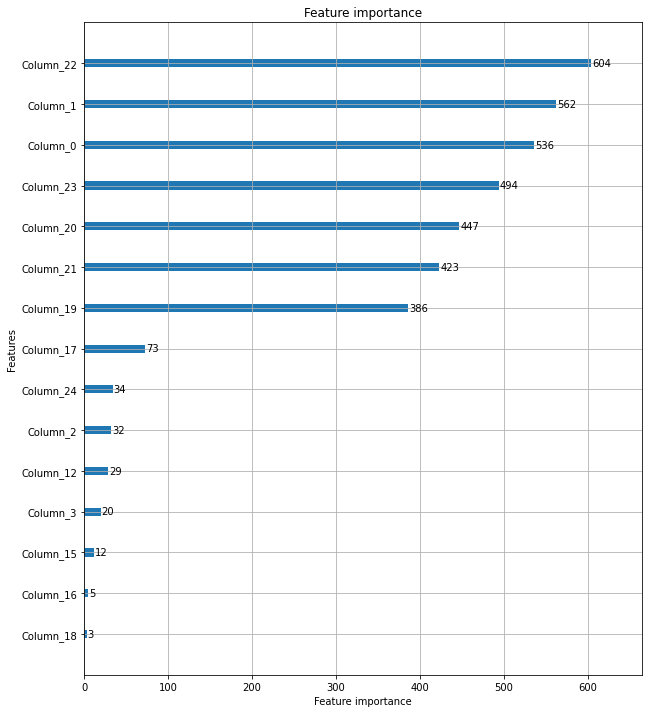

In [ ]:
# Feature importance
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax = ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


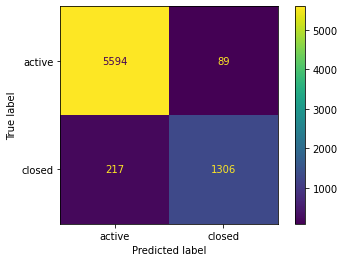

In [ ]:
# 혼동행렬렬
plot_confusion_matrix(lgbm_wrapper,
                      test_input,
                      test_target,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs = lgbm_wrapper.predict(test_input)

In [ ]:
y_preds = [1 if x>0.5 else 0 for x in y_pred_probs]
print(confusion_matrix(test_target, y_preds))
print(classification_report(test_target, y_preds))
print(roc_auc_score(test_target, y_preds))

[[5594   89]
 [ 217 1306]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5683
           1       0.94      0.86      0.90      1523

    accuracy                           0.96      7206
   macro avg       0.95      0.92      0.93      7206
weighted avg       0.96      0.96      0.96      7206

0.920928656950976
